# Importar dependencias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Función que define la longitud de traza

In [13]:
def trace_length_cylinder_plane(a, n):
    
    t = np.linspace(0, 2 * np.pi, n + 1)

    x_t = a * np.cos(t)
    y_t = a * np.sin(t)
    z_t = (8 - a * (np.cos(t) + np.sin(t))) / 2

    dx_dt = -a * np.sin(t)
    dy_dt = a * np.cos(t)
    dz_dt = -a * (np.cos(t) + np.sin(t)) / 2

    ds = np.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2)

    trace_length = np.sum(ds) * (2 * np.pi / n)

    return trace_length

In [14]:
a_example = 2 
n_example = 1000

In [15]:
trace_length_approx = trace_length_cylinder_plane(a_example, n_example)

In [16]:
print(trace_length_approx)

14.028219835020625


# Función para graficar

# Ingreso de Datos

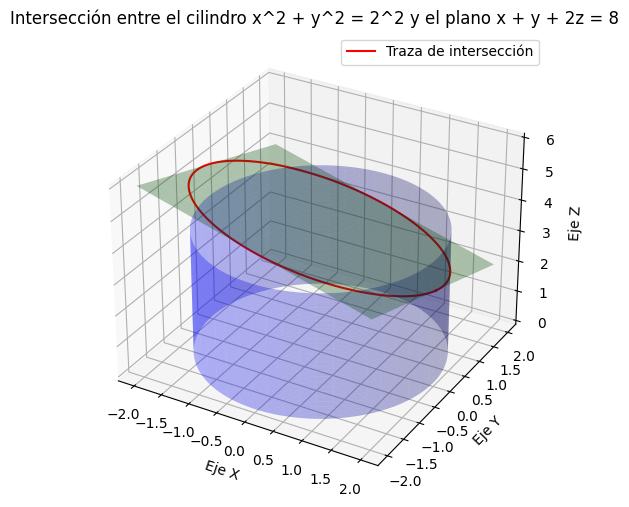

In [17]:
def plot_matching_trace_cylinder_plane(a):

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    t = np.linspace(0, 2 * np.pi, 1000)

    X_trace = a * np.cos(t)
    Y_trace = a * np.sin(t)
    Z_trace = (8 - a * (np.cos(t) + np.sin(t))) / 2

    theta = np.linspace(0, 2 * np.pi, 100)
    Z_cylinder = np.linspace(0, 2 * a, 100)
    Theta, Z_cylinder = np.meshgrid(theta, Z_cylinder)
    X_cylinder = a * np.cos(Theta)
    Y_cylinder = a * np.sin(Theta)

    X_plane, Y_plane = np.meshgrid(np.linspace(-a, a, 10), np.linspace(-a, a, 10))
    Z_plane = (8 - X_plane - Y_plane) / 2

    ax.plot_surface(X_cylinder, Y_cylinder, Z_cylinder, alpha=0.3, color='blue')
    ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.3, color='green')

    ax.plot(X_trace, Y_trace, Z_trace, color='red', label='Traza de intersección')

    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    ax.set_title('Intersección entre el cilindro x^2 + y^2 = {}^2 y el plano x + y + 2z = 8'.format(a))
    ax.legend()

    plt.show()

plot_matching_trace_cylinder_plane(a_example)